In [2]:
from collections import defaultdict
import json
import glob
import os
import sys
from typing import Tuple

import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd

from source import load_avenio_files
from fragment_count.utils import (
    filter_no_fragments,
    load_samples_as_data_frame,
    pool,
    pool_and_normalise, 
    pool_timepoints, 
    safe_normalise,
)
from fragment_count.views import plot_distribution_comparison, plot_distribution, plot_distribution_errorbar

In [3]:
patient_mutations, clinical_data = load_avenio_files()

In [4]:
respond = clinical_data['response_grouped'] == 'responder (pr+cr)'
response_id = clinical_data[respond].index
non_response_id = clinical_data[~respond].index

In [5]:
response_samples = []
non_response_samples = []

for ptid in response_id:
    response_samples += glob.glob(f'fragment_count/output/tumor_derived/{ptid}*.json')
    
for ptid in non_response_id:
    non_response_samples += glob.glob(f'fragment_count/output/tumor_derived/{ptid}*.json')

In [6]:
resp_normal, resp_var = load_samples_as_data_frame(response_samples)
non_resp_normal, non_resp_var = load_samples_as_data_frame(non_response_samples)

(80, 400)

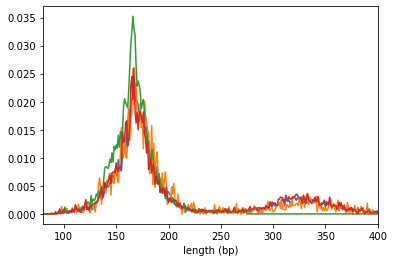

In [7]:
pool_and_normalise(resp_normal).loc['1023'].plot()
pool_and_normalise(resp_normal).loc['1031'].plot()
pool_and_normalise(resp_normal).loc['982'].plot()
pool_and_normalise(resp_normal).loc['1035'].plot()
fragment_window = [80, 400]
plt.xlim(fragment_window)

integral 1.0
integral 1.0000000000000002


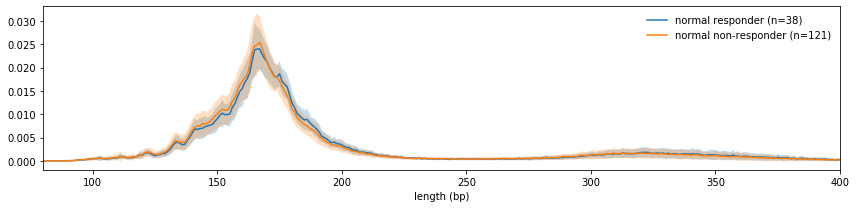

In [8]:
plt.figure(figsize=(12,3))
plot_distribution_errorbar(resp_normal.sum(axis=1), label='normal responder')
plot_distribution_errorbar(non_resp_normal.sum(axis=1), label='normal non-responder')
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('figs/normals.png')

integral 1.0
integral 1.0


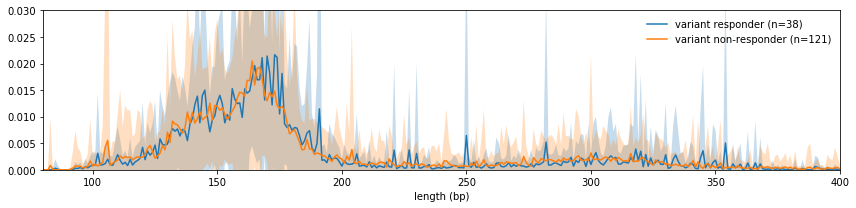

In [9]:
plt.figure(figsize=(12,3))
plot_distribution_errorbar(resp_var.sum(axis=1), label='variant responder')
plot_distribution_errorbar(non_resp_var.sum(axis=1), label='variant non-responder')
plt.legend(frameon=False)
plt.ylim([0.0, 0.03])
plt.tight_layout()
plt.savefig('figs/variants.png')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


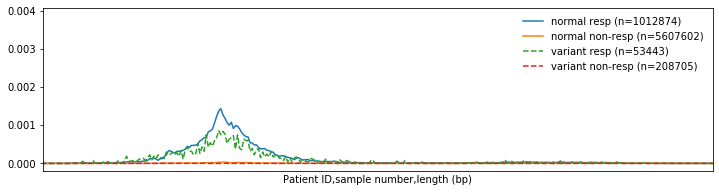

In [10]:
plt.figure(figsize=(12,3))
figure_labels = {
    'resp_normal': f'normal resp (n={pool(resp_normal).sum()})',
    'non_resp_normal': f'normal non-resp (n={pool(non_resp_normal).sum()})',
    'resp_variant': f'variant resp (n={pool(resp_var).sum()})',
    'non_resp_variant': f'variant non-resp (n={pool(non_resp_var).sum()})',
}
with mpl.rc_context(rc={'lines.linestyle':'-'}):
    plot_distribution(
        resp_normal.sum(axis=1), 
        label=figure_labels['resp_normal'], 
        with_peaks=False,
    )
    plot_distribution(
        non_resp_normal.sum(axis=1), 
        label=figure_labels['non_resp_normal'], 
        with_peaks=False,
    )
    
# with plt.style.context('linestyle'):
with mpl.rc_context(rc={'lines.linestyle':'--'}):
    plot_distribution(
        resp_var.sum(axis=1), 
        label=figure_labels['resp_variant'], 
        with_peaks=False,
    )
    plot_distribution(
        non_resp_var.sum(axis=1), 
        label=figure_labels['non_resp_variant'], 
        with_peaks=False,
    )
    plt.legend(frameon=False)
plt.savefig('figs/distributions_with_response.png')

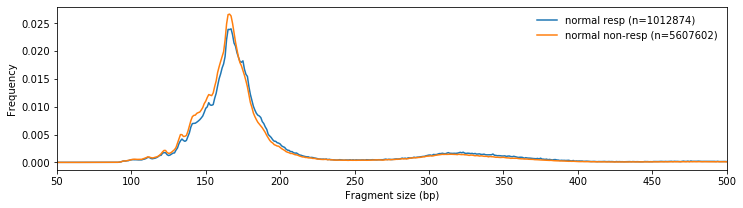

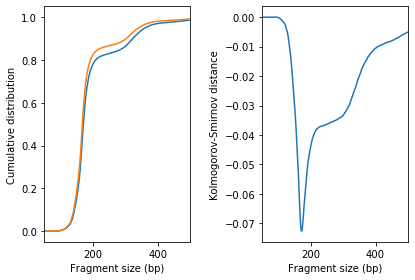

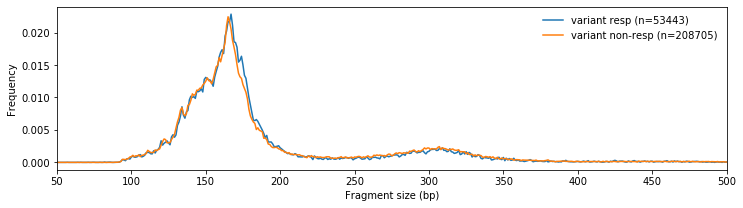

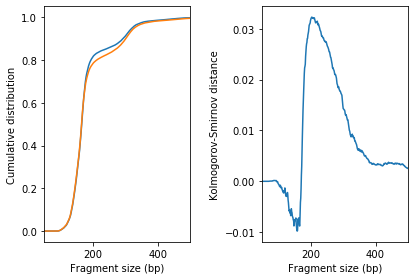

In [11]:
plt.figure(figsize=(12,3))
plot_distribution_comparison(
    pool(resp_normal), 
    pool(non_resp_normal),
    labels=[figure_labels['resp_normal'], figure_labels['non_resp_normal']],
    filename_suffix='response_normal',
)
plt.savefig('figs/normal_response.png')
plt.figure(figsize=(12,3))
plot_distribution_comparison(
    pool(resp_var), 
    pool(non_resp_var),
    labels=[figure_labels['resp_variant'], figure_labels['non_resp_variant']],
    filename_suffix='response_variant',
)
plt.savefig('figs/variant_response.png')